In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random    

In [2]:
col_names = ['Unnamed','Flow_ID','Source_IP','Source_Port','Destination_IP','Destination_Port',
             'Protocol','Timestamp','Flow_Duration','Total_Fwd_Packets','Total_Backward_Packets',
             'Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets','Fwd_Packet_Length_Max','Fwd_Packet_Length_Min',
             'Fwd_Packet_Length_Mean','Fwd_Packet_Length_Std','Bwd_Packet_Length_Max','Bwd_Packet_Length_Min',
             'Bwd_Packet_Length_Mean','Bwd_Packet_Length_Std','Flow_Bytes/s','Flow_Packets/s','Flow_IAT_Mean', 
             'Flow_IAT_Std','Flow_IAT_Max','Flow_IAT_Min','Fwd_IAT_Total','Fwd_IAT_Mean','Fwd_IAT_Std','Fwd_IAT_Max',
             'Fwd_IAT_Min','Bwd_IAT_Total','Bwd_IAT_Mean','Bwd_IAT_Std','Bwd_IAT_Max','Bwd_IAT_Min','Fwd_PSH_Flags',
             'Bwd_PSH_Flags','Fwd_URG_Flags','Bwd_URG_Flags','Fwd_Header_Length','Bwd_Header_Length','Fwd_Packets/s',
             'Bwd_Packets/s','Min_Packet_Length','Max_Packet_Length','Packet_Length_Mean','Packet_Length_Std',
             'Packet_Length_Variance','FIN_Flag_Count','SYN_Flag_Count','RST_Flag_Count','PSH-Flag_Count',
             'ACK_Flag_Count','URG_Flag_Count','CWE_Flag_Count','ECE_Flag_Count','Down/Up_Ratio','Average_Packet_Size',
             'Avg_Fwd_Segment_Size','Avg_Bwd_Segment_Size','Fwd_Header_Length.1','Fwd_Avg_Bytes/Bulk',
             'Fwd_Avg_Packets/Bulk','Fwd_Avg_Bulk_Rate','Bwd_Avg_Bytes/Bulk','Bwd_Avg_Packets/Bulk',
             'Bwd_Avg_Bulk_Rate','Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes',
             'Init_Win_bytes_forward','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward','Active_Mean',
             'Active_Std','Active_Max','Active_Min','Idle_Mean','Idle_Std','Idle_Max','Idle_Min','SimillarHTTP',
             'Inbound','Label']


#Training set
df = pd.read_csv("/home/bbm/Documents/Edu/AAU/Thesis/CICDDoS2019 Dataset/AlDDoS.csv", header=None, names = col_names)
# Testing set
# df_test = pd.read_csv("/home/bbm/Documents/Edu/AAU/Thesis/CICDDoS2019 Dataset/DS/Classified/AlDDoS_testnoh.csv", header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
# print('Dimensions of the Test set:',df_test.shape)

/home/bbm/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Dimensions of the Training set: (120000, 88)


In [3]:
df.columns = df.columns.str.strip()
df.head(5)

,Unnamed,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,750,172.16.0.5-192.168.50.1-634-56837-17,172.16.0.5,634,192.168.50.1,56837,17,2018-12-01 10:51:44.467358,51876,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,584,172.16.0.5-192.168.50.1-634-57912-17,172.16.0.5,634,192.168.50.1,57912,17,2018-12-01 10:52:07.389959,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,3248,172.16.0.5-192.168.50.1-634-2500-17,172.16.0.5,634,192.168.50.1,2500,17,2018-12-01 10:53:00.111827,36869,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,1804,172.16.0.5-192.168.50.1-634-12106-17,172.16.0.5,634,192.168.50.1,12106,17,2018-12-01 10:53:55.757296,96620,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,1260,172.16.0.5-192.168.50.1-634-52998-17,172.16.0.5,634,192.168.50.1,52998,17,2018-12-01 10:54:26.832133,20771,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [4]:
df['Label'].value_counts()

DrDoS_NTP     20000
TFTP          20000
DrDoS_SNMP    20000
BENIGN        20000
DrDoS_LDAP    20000
DrDoS_DNS     20000
Name: Label, dtype: int64

In [5]:
df = df.drop(['Unnamed'], axis = 1)

In [6]:
df.columns

Index(['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Total_Fwd_Packets', 'Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s',
       'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
  

In [7]:
data = df.replace(np.inf, np.nan)
data.isnull().sum().sum()

3922

In [8]:
df = data.dropna(axis=0)
df.isnull().sum().sum()

0

In [9]:
df

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-634-56837-17,172.16.0.5,634,192.168.50.1,56837,17,2018-12-01 10:51:44.467358,51876,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-634-57912-17,172.16.0.5,634,192.168.50.1,57912,17,2018-12-01 10:52:07.389959,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-634-2500-17,172.16.0.5,634,192.168.50.1,2500,17,2018-12-01 10:53:00.111827,36869,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-634-12106-17,172.16.0.5,634,192.168.50.1,12106,17,2018-12-01 10:53:55.757296,96620,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-634-52998-17,172.16.0.5,634,192.168.50.1,52998,17,2018-12-01 10:54:26.832133,20771,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,192.168.50.8-204.154.111.130-61630-443-6,192.168.50.8,61630,204.154.111.130,443,6,2018-12-01 17:15:43.863729,1612931,14,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
119996,192.168.50.8-204.154.111.130-61630-443-6,204.154.111.130,443,192.168.50.8,61630,6,2018-12-01 17:15:45.476661,350,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,BENIGN
119997,192.168.10.50-192.168.50.8-22-61631-6,192.168.50.8,61631,192.168.10.50,22,6,2018-12-01 17:16:09.958323,9016288,6,0,...,0.0,3009226.0,3009226.0,6007059.0,0.0,6007059.0,6007059.0,0,1,BENIGN
119998,192.168.50.8-204.154.111.130-61632-443-6,192.168.50.8,61632,204.154.111.130,443,6,2018-12-01 17:16:12.341928,21193,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN


In [10]:
data_X = df.drop(['Label', 'SimillarHTTP'], axis = 1) 
data_X.columns 

Index(['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Total_Fwd_Packets', 'Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s',
       'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
  

In [11]:
data_X.shape 

(118039, 85)

In [12]:
data_y = df['Label']
data_y.shape 

(118039,)

In [13]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_NTP', 'DrDoS_SNMP',
       'TFTP'], dtype=object)

In [14]:
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in Source_IP:')
print(df['Source_IP'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'Flow_ID' has 110284 categories
Feature 'Source_IP' has 433 categories
Feature 'Destination_IP' has 513 categories
Feature 'Timestamp' has 118019 categories
Feature 'SimillarHTTP' has 214 categories
Feature 'Label' has 6 categories

Distribution of categories in Source_IP:
172.16.0.5        98148
192.168.50.6       5426
192.168.50.7       5210
192.168.50.8       5027
74.208.236.171      456
Name: Source_IP, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder 

In [16]:
le = LabelEncoder()

In [17]:
data_y_trans = le.fit_transform(data_y)

In [18]:
data_y_trans

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
le_fid = LabelEncoder()
le_fid.fit(data_X['Flow_ID'])
data_X['Flow_ID'] = le_fid.fit_transform(data_X['Flow_ID'])

le_fid = LabelEncoder()
le_fid.fit(data_X['Source_IP'])
data_X['Source_IP'] = le_fid.fit_transform(data_X['Source_IP'])

le_fid = LabelEncoder()
le_fid.fit(data_X['Destination_IP'])
data_X['Destination_IP'] = le_fid.fit_transform(data_X['Destination_IP'])

le_fid = LabelEncoder()
le_fid.fit(data_X['Timestamp'])
data_X['Timestamp'] = le_fid.fit_transform(data_X['Timestamp'])

In [20]:
data_X

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Inbound
0,41726,33,634,186,56837,17,26848,51876,200,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,41784,33,634,186,57912,17,26856,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,40060,33,634,186,2500,17,27166,36869,200,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,39353,33,634,186,12106,17,27216,96620,200,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,41533,33,634,186,52998,17,27270,20771,90,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,107311,171,61630,212,443,6,118013,1612931,14,17,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
119996,107311,193,443,191,61630,6,118014,350,1,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
119997,100134,171,61631,185,22,6,118015,9016288,6,0,...,28,3009226.0,0.0,3009226.0,3009226.0,6007059.0,0.0,6007059.0,6007059.0,1
119998,107312,171,61632,212,443,6,118016,21193,1,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
data_X.dtypes

Flow_ID               int64
Source_IP             int64
Source_Port           int64
Destination_IP        int64
Destination_Port      int64
                     ...   
Idle_Mean           float64
Idle_Std            float64
Idle_Max            float64
Idle_Min            float64
Inbound               int64
Length: 85, dtype: object

In [22]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

# model_T = ExtraTreesClassifier(random_state=42)
# model_T.fit(data_T, data_Ty_trans)

ExtraTreesClassifier(random_state=42)

In [23]:
model.feature_importances_

array([3.41851393e-02, 2.05194140e-02, 6.99746035e-02, 1.12274019e-02,
       1.72712127e-02, 2.35345863e-02, 2.75051122e-01, 2.53140690e-03,
       4.22405914e-03, 2.71015690e-03, 7.96523286e-03, 1.95769144e-05,
       1.56391619e-02, 5.96979723e-02, 3.87723122e-02, 2.67151082e-03,
       2.08267138e-04, 3.00703754e-03, 2.38422865e-03, 3.27467388e-04,
       3.38038248e-02, 2.02651212e-02, 7.47820552e-03, 4.81467585e-03,
       3.80871100e-03, 4.93271854e-03, 3.12102018e-03, 6.07054263e-03,
       2.38597745e-03, 3.07383980e-03, 2.87134136e-03, 2.55221577e-04,
       8.88605112e-05, 1.21832777e-04, 6.91702240e-05, 1.11985967e-03,
       1.64426731e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.64403283e-03, 7.45703009e-05, 1.71472355e-02, 7.08963128e-04,
       6.03002082e-02, 2.29967778e-02, 3.56258951e-02, 8.17901004e-04,
       4.82771377e-04, 0.00000000e+00, 9.31314796e-06, 7.96093060e-04,
       0.00000000e+00, 1.81787784e-03, 1.03868288e-02, 2.38316100e-03,
      

<AxesSubplot:title={'center':'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

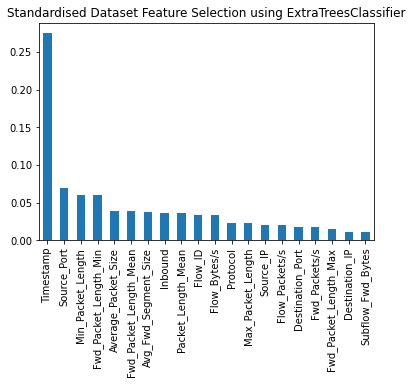

In [24]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [25]:
data_X.shape 

(118039, 85)

In [26]:
data_new_20features_X = data_X[['Timestamp','Source_Port','Min_Packet_Length','Fwd_Packet_Length_Min',
                                'Average_Packet_Size','Fwd_Packet_Length_Mean','Avg_Fwd_Segment_Size','Inbound',
                                'Packet_Length_Mean', 'Flow_ID', 'Flow_Bytes/s','Protocol','Max_Packet_Length',
                                'Source_IP','Flow_Packets/s','Destination_Port','Fwd_Packets/s',
                                'Fwd_Packet_Length_Max','Destination_IP','Subflow_Fwd_Bytes']] 

In [27]:
data_new_20features_X

,Timestamp,Source_Port,Min_Packet_Length,Fwd_Packet_Length_Min,Average_Packet_Size,Fwd_Packet_Length_Mean,Avg_Fwd_Segment_Size,Inbound,Packet_Length_Mean,Flow_ID,Flow_Bytes/s,Protocol,Max_Packet_Length,Source_IP,Flow_Packets/s,Destination_Port,Fwd_Packets/s,Fwd_Packet_Length_Max,Destination_IP,Subflow_Fwd_Bytes
0,26848,634,440.0,440.0,442.200000,440.000000,440.000000,1,440.00000,41726,1.696353e+06,17,440.0,33,3855.347367,56837,3855.347367,440.0,186,88000
1,26856,634,440.0,440.0,660.000000,440.000000,440.000000,1,440.00000,41784,2.933333e+08,17,440.0,33,666666.666667,57912,666666.666667,440.0,186,880
2,27166,634,440.0,440.0,442.200000,440.000000,440.000000,1,440.00000,40060,2.386829e+06,17,440.0,33,5424.611462,2500,5424.611462,440.0,186,88000
3,27216,634,440.0,440.0,442.200000,440.000000,440.000000,1,440.00000,39353,9.107845e+05,17,440.0,33,2069.964811,12106,2069.964811,440.0,186,88000
4,27270,634,440.0,440.0,444.888889,440.000000,440.000000,1,440.00000,41533,1.906504e+06,17,440.0,33,4332.964229,52998,4332.964229,440.0,186,39600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,118013,61630,0.0,0.0,505.838710,352.285714,352.285714,0,490.03125,107311,9.722053e+03,6,2920.0,171,19.219669,443,8.679851,1823.0,212,4932
119996,118014,443,0.0,31.0,15.500000,31.000000,31.000000,1,12.40000,107311,8.857143e+04,6,31.0,193,11428.571429,61630,2857.142857,31.0,191,31
119997,118015,61631,0.0,0.0,0.000000,0.000000,0.000000,1,0.00000,100134,0.000000e+00,6,0.0,171,0.665462,22,0.665462,0.0,185,0
119998,118016,61632,0.0,0.0,0.000000,0.000000,0.000000,0,0.00000,107312,0.000000e+00,6,0.0,171,141.556174,443,47.185391,0.0,212,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)
X_test.shape 

(35412, 85)

In [29]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [30]:
from sklearn.model_selection import train_test_split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [31]:
from sklearn.preprocessing import StandardScaler 
ss_fs = StandardScaler()
X_train_std_fs = ss_fs.fit_transform(X_train_fs)
X_test_std_fs = ss_fs.fit_transform(X_test_fs)
X_train_std_fs.shape 

(82627, 20)

                                IMPORT LIBRARIES

In [62]:
from __future__ import print_function
np.random.seed(1337)  # for reproducibility

# import tensorflow as tf
# from tensorflow import keras
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Lambda, Flatten, Bidirectional
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Convolution1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPool2D, LSTM
from keras.utils.np_utils import to_categorical
from keras.layers import TimeDistributed
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

                                LSTM

In [49]:
y_train_lstm = np.array(y_train)
y_test_lstm = np.array(y_test)

y_train_onehot_lstm = to_categorical(y_train_lstm)
y_test_one_hot_lstm = to_categorical(y_test_lstm)

X_train_lstm = np.array(X_train_std)
X_test_lstm = np.array(X_test_std) 

# Reshape 
X_train_lstm_reshape = np.reshape(X_train_std, (X_train_lstm.shape[0], 1,  X_train_lstm.shape[1]))
X_test_lstm_reshape = np.reshape(X_test_std, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))


# For feature selection
y_train_lstm_fs = np.array(y_train_fs)
y_test_lstm_fs = np.array(y_test_fs)

y_train_onehot_lstm_fs = to_categorical(y_train_lstm_fs)
y_test_one_hot_lstm_fs = to_categorical(y_test_lstm_fs)

X_train_lstm_fs = np.array(X_train_std_fs)
X_test_lstm_fs = np.array(X_test_std_fs) 

# Reshape 
X_train_lstm_reshape_fs = np.reshape(X_train_std_fs, (X_train_lstm_fs.shape[0], 1,  X_train_lstm_fs.shape[1]))
X_test_lstm_reshape_fs = np.reshape(X_test_std_fs, (X_test_lstm_fs.shape[0], 1, X_test_lstm_fs.shape[1]))



In [318]:
 batch_size = 100

# Initialize the network
model_LSTM = Sequential()
model_LSTM.add(LSTM(8,input_dim=85, return_sequences=True)) 
# model_LSTM.add(LSTM(8,input_dim=20, return_sequences=True)) 
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(8,input_dim=85, return_sequences=False))
# model_LSTM.add(LSTM(8,input_dim=20, return_sequences=False))
model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(6))
model_LSTM.add(Activation('softmax'))

In [319]:
model_LSTM.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, None, 8)           3008      
_________________________________________________________________
dropout_77 (Dropout)         (None, None, 8)           0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dropout_78 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 54        
_________________________________________________________________
activation_23 (Activation)   (None, 6)                 0         
Total params: 3,606
Trainable params: 3,606
Non-trainable params: 0
___________________________________________________

In [320]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [321]:
model_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(X_train_lstm_reshape, y_train_onehot_lstm, validation_data=(X_test_lstm_reshape, y_test_one_hot_lstm),batch_size=batch_size, epochs=50,callbacks=[monitor])

# For feature selection
# model_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_LSTM.fit(X_train_lstm_reshape_fs, y_train_onehot_lstm_fs, validation_data=(X_test_lstm_reshape_fs, y_test_one_hot_lstm_fs),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
827/827 [==============================] - 5s 4ms/step - loss: 1.3323 - accuracy: 0.5646 - val_loss: 0.6437 - val_accuracy: 0.6670
Epoch 2/50
827/827 [==============================] - 2s 3ms/step - loss: 0.6372 - accuracy: 0.6664 - val_loss: 0.5676 - val_accuracy: 0.6681
Epoch 3/50
827/827 [==============================] - 3s 3ms/step - loss: 0.5593 - accuracy: 0.7236 - val_loss: 0.2881 - val_accuracy: 0.9413
Epoch 4/50
827/827 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.9172 - val_loss: 0.1146 - val_accuracy: 0.9877
Epoch 5/50
827/827 [==============================] - 2s 3ms/step - loss: 0.1682 - accuracy: 0.9458 - val_loss: 0.0724 - val_accuracy: 0.9907
Epoch 6/50
827/827 [==============================] - 2s 3ms/step - loss: 0.1322 - accuracy: 0.9579 - val_loss: 0.0530 - val_accuracy: 0.9939
Epoch 7/50
827/827 [==============================] - 2s 2ms/step - loss: 0.1168 - accuracy: 0.9583 - val_loss: 0.0398 - val_accuracy: 0.9943
Epoch 

In [322]:
y_perd_lstm = model_LSTM.predict_classes(X_test_lstm_reshape, verbose=0)
# y_perd_lstm_fs = model_LSTM.predict_classes(X_test_lstm_reshape_fs, verbose=0)

/home/bbm/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [314]:
# print("Classification Report for LSTM: \n", classification_report(le.inverse_transform(y_test_lstm), le.inverse_transform(y_perd_lstm)))
print("Classification Report for LSTM: \n", classification_report(le.inverse_transform(y_test_lstm_fs), le.inverse_transform(y_perd_lstm_fs)))

Classification Report for LSTM: 
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      5903
   DrDoS_DNS       0.96      0.94      0.95      5799
  DrDoS_LDAP       0.94      0.86      0.90      5939
   DrDoS_NTP       0.96      1.00      0.98      5988
  DrDoS_SNMP       0.90      0.95      0.93      6061
        TFTP       1.00      1.00      1.00      5722

    accuracy                           0.96     35412
   macro avg       0.96      0.96      0.96     35412
weighted avg       0.96      0.96      0.96     35412



In [234]:
lstm_conf_mat = confusion_matrix(y_test_lstm, y_perd_lstm)
# lstm_conf_mat = confusion_matrix(y_test_lstm_fs, y_perd_lstm_fs)
print("LSTM Confusion: \n", lstm_conf_mat)

LSTM Confusion: 
 [[5898    0    0    1    1    3]
 [   0 5723   27   49    0    0]
 [   0    2 5866    0   71    0]
 [   9    3    0 5976    0    0]
 [   1    0    0    0 6058    2]
 [   2    0    0    0    0 5720]]


In [323]:
acc_score_lstm = accuracy_score(y_test_lstm, y_perd_lstm)
# acc_score_lstm = accuracy_score(y_test_lstm_fs, y_perd_lstm_fs)
print("Accuracy Score for LSTM: \n", acc_score_lstm*100)

Accuracy Score for LSTM: 
 99.37874166949057


                                BiLSTM

In [253]:
y_train_bilstm = np.array(y_train)
y_test_bilstm = np.array(y_test)

y_train_onehot_bilstm = to_categorical(y_train_bilstm)
y_test_one_hot_bilstm = to_categorical(y_test_bilstm)

X_train_bilstm = np.array(X_train_std)
X_test_bilstm = np.array(X_test_std) 

# Reshape 
X_train_bilstm_reshape = np.reshape(X_train_std, (X_train_bilstm.shape[0], 1,  X_train_bilstm.shape[1]))
X_test_bilstm_reshape = np.reshape(X_test_std, (X_test_bilstm.shape[0], 1, X_test_bilstm.shape[1]))


# For feature selection
y_train_bilstm_fs = np.array(y_train_fs)
y_test_bilstm_fs = np.array(y_test_fs)

y_train_onehot_bilstm_fs = to_categorical(y_train_bilstm_fs)
y_test_one_hot_bilstm_fs = to_categorical(y_test_bilstm_fs)

X_train_bilstm_fs = np.array(X_train_std_fs)
X_test_bilstm_fs = np.array(X_test_std_fs) 

# Reshape 
X_train_bilstm_reshape_fs = np.reshape(X_train_std_fs, (X_train_bilstm_fs.shape[0], 1,  X_train_lstm_fs.shape[1]))
X_test_bilstm_reshape_fs = np.reshape(X_test_std_fs, (X_test_bilstm_fs.shape[0], 1, X_test_bilstm_fs.shape[1]))



In [269]:
np.random.seed(337)  
batch_size = 1000

model_BiLSTM = Sequential()
model_BiLSTM.add(Bidirectional(LSTM(8,input_dim=85, return_sequences=True))) 
# model_BiLSTM.add(Bidirectional(LSTM(8,input_dim=20, return_sequences=True))) 
model_BiLSTM.add(Dropout(0.1))
model_BiLSTM.add(Bidirectional(LSTM(8,input_dim=85, return_sequences=False)))
# model_BiLSTM.add(Bidirectional(LSTM(8,input_dim=20, return_sequences=False)))
model_BiLSTM.add(Dropout(0.1))
model_BiLSTM.add(Dense(6))
model_BiLSTM.add(Activation('softmax'))

In [317]:
model_BiLSTM.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (None, 1, 16)             6016      
_________________________________________________________________
dropout_70 (Dropout)         (None, 1, 16)             0         
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 16)                1600      
_________________________________________________________________
dropout_71 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 6)                 102       
_________________________________________________________________
activation_21 (Activation)   (None, 6)                 0         
Total params: 7,718
Trainable params: 7,718
Non-trainable params: 0
___________________________________________________

In [270]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [274]:
model_BiLSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_BiLSTM.fit(X_train_bilstm_reshape, y_train_onehot_bilstm, validation_data=(X_test_bilstm_reshape, y_test_one_hot_bilstm),batch_size=batch_size, epochs=50,callbacks=[monitor])

# For feature selection
# model_BiLSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_BiLSTM.fit(X_train_bilstm_reshape_fs, y_train_onehot_bilstm_fs, validation_data=(X_test_bilstm_reshape_fs, y_test_one_hot_bilstm_fs),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
83/83 [==============================] - 8s 28ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0148 - val_accuracy: 0.9956
Epoch 2/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.0115 - val_accuracy: 0.9972
Epoch 3/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0199 - accuracy: 0.9948 - val_loss: 0.0127 - val_accuracy: 0.9966
Epoch 4/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0136 - val_accuracy: 0.9953
Epoch 5/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0107 - val_accuracy: 0.9975
Epoch 6/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0114 - val_accuracy: 0.9971
Epoch 7/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0160 - accuracy: 0.9958 - val_loss: 0.0122 - val_accuracy: 0.9966
Restoring model wei

In [275]:
y_perd_bilstm = model_BiLSTM.predict_classes(X_test_bilstm_reshape, verbose=0)
# y_perd_bilstm_fs = model_BiLSTM.predict_classes(X_test_bilstm_reshape_fs, verbose=0)

/home/bbm/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [75]:
print("Classification Report for BiLSTM: \n", classification_report(le.inverse_transform(y_test_bilstm), le.inverse_transform(y_perd_bilstm)))
# print("Classification Report for BiLSTM: \n", classification_report(le.inverse_transform(y_test_bilstm_fs), le.inverse_transform(y_perd_bilstm_fs)))

Classification Report for BiLSTM: 
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      5903
   DrDoS_DNS       1.00      0.98      0.99      5799
  DrDoS_LDAP       1.00      0.99      1.00      5939
   DrDoS_NTP       0.98      1.00      0.99      5988
  DrDoS_SNMP       0.99      1.00      1.00      6061
        TFTP       1.00      1.00      1.00      5722

    accuracy                           1.00     35412
   macro avg       1.00      1.00      1.00     35412
weighted avg       1.00      1.00      1.00     35412



In [76]:
lstm_conf_mat = confusion_matrix(y_test_bilstm, y_perd_bilstm)
# lstm_conf_mat = confusion_matrix(y_test_bilstm_fs, y_perd_bilstm_fs)
print("BiLSTM Confusion: \n", lstm_conf_mat)

LSTM Confusion: 
 [[5893    1    1    2    0    6]
 [   0 5706    1   92    0    0]
 [   0    5 5897    0   36    1]
 [   0    2    0 5986    0    0]
 [   0    1    0    0 6057    3]
 [   2    2    0    0    0 5718]]


In [276]:
acc_score_lstm = accuracy_score(y_test_bilstm, y_perd_bilstm)
# acc_score_lstm = accuracy_score(y_test_bilstm_fs, y_perd_bilstm_fs)
print("Accuracy Score for BiLSTM: \n", acc_score_lstm*100)

Accuracy Score for BiLSTM: 
 99.71760984976844


                                CNN

In [47]:
y_train_cnn = np.array(y_train)
y_test_cnn = np.array(y_test)

y_train_onehot_cnn = to_categorical(y_train_cnn)
y_test_one_hot_cnn = to_categorical(y_test_cnn)

X_train_cnn = np.array(X_train_std)
X_test_cnn = np.array(X_test_std) 

# Reshape 
X_train_cnn_reshape = np.reshape(X_train_std, (X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn_reshape = np.reshape(X_test_std, (X_test_cnn.shape[0], X_test_cnn.shape[1], 1))


# For feature selection
y_train_cnn_fs = np.array(y_train_fs)
y_test_cnn_fs = np.array(y_test_fs)

y_train_onehot_cnn_fs = to_categorical(y_train_cnn_fs)
y_test_one_hot_cnn_fs = to_categorical(y_test_cnn_fs)

X_train_cnn_fs = np.array(X_train_std_fs)
X_test_cnn_fs = np.array(X_test_std_fs) 

# Reshape 
X_train_cnn_reshape_fs = np.reshape(X_train_std_fs, (X_train_cnn_fs.shape[0], X_train_cnn_fs.shape[1], 1))
X_test_cnn_reshape_fs = np.reshape(X_test_std_fs, (X_test_cnn_fs.shape[0], X_test_cnn_fs.shape[1], 1))

In [278]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True)

/home/bbm/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [70]:
np.random.seed(0)  
# batch_size = 1000
model_CNN = Sequential()
model_CNN.add(Convolution1D(128, 3, activation="relu", input_shape=(85,1)))
# model_CNN.add(Convolution1D(128, 3, activation="relu", input_shape=(20,1)))
model_CNN.add(Convolution1D(64, 3, activation="relu"))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Dropout(rate=0.1))
model_CNN.add(Flatten())
model_CNN.add(Dense(6))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [71]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [72]:
model_CNN.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 83, 128)           512       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 81, 64)            24640     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 40, 64)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 40, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 15366     
Total params: 40,518
Trainable params: 40,518
Non-trainable params: 0
__________________________________________________

In [73]:
# model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_CNN.fit(X_train_cnn_reshape, y_train_onehot_cnn, validation_data=(X_test_cnn_reshape, y_test_one_hot_cnn),batch_size=batch_size, epochs=50,callbacks=[monitor])

# For feature selection
# model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_CNN.fit(X_train_cnn_reshape_fs, y_train_onehot_cnn_fs, validation_data=(X_test_cnn_reshape_fs, y_test_one_hot_cnn_fs),batch_size=batch_size, epochs=50,callbacks=[monitor])


model_CNN.compile(loss="mean_absolute_error", optimizer="adam", metrics=['accuracy'])
model_CNN.fit(X_train_cnn_reshape, y_train_onehot_cnn, batch_size=1000, epochs=50, callbacks=[monitor], validation_data=(X_test_cnn_reshape, y_test_one_hot_cnn))

# model_CNN.compile(loss="mean_absolute_error", optimizer="adam", metrics=['accuracy'])
# model_CNN.fit(X_train_cnn_reshape_fs, y_train_onehot_cnn_fs, batch_size=1000, epochs=50, callbacks=[monitor], validation_data=(X_test_cnn_reshape_fs, y_test_one_hot_cnn_fs))

Epoch 1/50
83/83 [==============================] - 24s 256ms/step - loss: 9.2192 - accuracy: 0.2265 - val_loss: 8.9351 - val_accuracy: 0.2913
Epoch 2/50
83/83 [==============================] - 19s 231ms/step - loss: 9.0889 - accuracy: 0.2900 - val_loss: 9.2899 - val_accuracy: 0.2943
Epoch 3/50
83/83 [==============================] - 21s 253ms/step - loss: 9.2186 - accuracy: 0.2919 - val_loss: 9.0122 - val_accuracy: 0.2944
Epoch 4/50
83/83 [==============================] - 23s 278ms/step - loss: 9.0983 - accuracy: 0.2938 - val_loss: 9.0199 - val_accuracy: 0.2946
Epoch 5/50
83/83 [==============================] - 23s 274ms/step - loss: 9.1120 - accuracy: 0.2918 - val_loss: 8.6558 - val_accuracy: 0.2946
Epoch 6/50
83/83 [==============================] - 22s 262ms/step - loss: 8.5494 - accuracy: 0.2915 - val_loss: 8.0782 - val_accuracy: 0.2858
Epoch 7/50
83/83 [==============================] - 21s 251ms/step - loss: 8.1506 - accuracy: 0.2853 - val_loss: 8.0782 - val_accuracy: 0.2867

In [68]:
y_perd_cnn = model_CNN.predict_classes(X_test_cnn_reshape, verbose=0)
# y_perd_cnn_fs = model_CNN.predict_classes(X_test_cnn_reshape_fs, verbose=0)

/home/bbm/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [291]:
# print("Classification Report for CNN: \n", classification_report(le.inverse_transform(y_test_cnn), le.inverse_transform(y_perd_cnn)))
print("Classification Report for CNN: \n", classification_report(le.inverse_transform(y_test_cnn_fs), le.inverse_transform(y_perd_cnn_fs)))

Classification Report for CNN: 
               precision    recall  f1-score   support

      BENIGN       0.91      1.00      0.95      5903
   DrDoS_DNS       0.95      0.92      0.94      5799
  DrDoS_LDAP       0.86      0.57      0.68      5939
   DrDoS_NTP       0.93      0.99      0.96      5988
  DrDoS_SNMP       0.73      0.86      0.79      6061
        TFTP       0.97      0.99      0.98      5722

    accuracy                           0.89     35412
   macro avg       0.89      0.89      0.88     35412
weighted avg       0.89      0.89      0.88     35412



In [151]:
# cnn_conf_mat = confusion_matrix(y_test_cnn, y_perd_cnn)
cnn_conf_mat = confusion_matrix(y_test_cnn_fs, y_perd_cnn_fs)
print("CNN Confusion: \n", cnn_conf_mat)

CNN Confusion: 
 [[5901    1    0    0    0    1]
 [  40 5413   64  271   11    0]
 [   3   12 5887    3   33    1]
 [  37    2    0 5946    3    0]
 [  22    3    2  218 5811    5]
 [  36    0    0    0    0 5686]]


In [69]:
acc_score_cnn = accuracy_score(y_test_cnn, y_perd_cnn)
# acc_score_cnn = accuracy_score(y_test_cnn_fs, y_perd_cnn_fs)
print("Accuracy Score for CNN: \n", acc_score_cnn*100)

Accuracy Score for CNN: 
 96.72427425731391


                                MLP

In [34]:
y_train_mlp = np.array(y_train)
y_test_mlp = np.array(y_test)

y_train_onehot_mlp = to_categorical(y_train_mlp)
y_test_one_hot_mlp = to_categorical(y_test_mlp)

X_train_mlp = np.array(X_train_std)
X_test_mlp = np.array(X_test_std)

# For feature selection
y_train_mlp_fs = np.array(y_train_fs)
y_test_mlp_fs = np.array(y_test_fs)

y_train_onehot_mlp_fs = to_categorical(y_train_mlp_fs)
y_test_one_hot_mlp_fs = to_categorical(y_test_mlp_fs)

X_train_mlp_fs = np.array(X_train_std_fs)
X_test_mlp_fs = np.array(X_test_std_fs)

In [74]:
batch_size = 100
np.random.seed(300)  

model_MLP = Sequential()
model_MLP.add(Dense(128,input_dim=20,activation='relu'))  
model_MLP.add(Dropout(0.01))
model_MLP.add(Dense(64,activation='relu'))  
model_MLP.add(Dropout(0.01))
model_MLP.add(Dense(16,activation='relu'))  
model_MLP.add(Dropout(0.01))
# model_MLP.add(Dense(2500,activation='relu'))  
# model_MLP.add(Dropout(0.01))
# model_MLP.add(Dense(2000,activation='relu'))  
# model_MLP.add(Dropout(0.01))
# model_MLP.add(Dense(1000,activation='relu'))  
# model_MLP.add(Dropout(0.01))
# model_MLP.add(Dense(500,activation='relu'))  
# model_MLP.add(Dropout(0.01))
# model_MLP.add(Dense(200,activation='relu'))  
# model_MLP.add(Dropout(0.01))
model_MLP.add(Dense(6))
model_MLP.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [75]:
# try using different optimizers and different optimizer configs
# model_MLP.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_MLP.fit(X_train_mlp, y_train_onehot_mlp, validation_data=(X_test_mlp, y_test_one_hot_mlp),batch_size=batch_size, epochs=50,callbacks=[monitor])


# For feature selection
model_MLP.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_MLP.fit(X_train_mlp_fs, y_train_onehot_mlp_fs, validation_data=(X_test_mlp_fs, y_test_one_hot_mlp_fs),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
827/827 [==============================] - 2s 2ms/step - loss: 0.3786 - accuracy: 0.8665 - val_loss: 0.0295 - val_accuracy: 0.9921
Epoch 2/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0239 - val_accuracy: 0.9903
Epoch 3/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.0173 - val_accuracy: 0.9933
Epoch 4/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9936 - val_loss: 0.0101 - val_accuracy: 0.9974
Epoch 5/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 6/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9950 - val_loss: 0.0179 - val_accuracy: 0.9938
Epoch 7/50
827/827 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.0207 - val_accuracy: 0.9920
Epoch 

In [76]:
# y_perd_mlp = model_MLP.predict_classes(X_test_mlp, verbose=0)
y_perd_mlp_fs = model_MLP.predict_classes(X_test_mlp_fs, verbose=0)

/home/bbm/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [224]:
# print("Classification Report for MLP: \n", classification_report(le.inverse_transform(y_test_mlp), le.inverse_transform(y_perd_mlp)))
print("Classification Report for MLP: \n", classification_report(le.inverse_transform(y_test_mlp_fs), le.inverse_transform(y_perd_mlp_fs)))

Classification Report for MLP: 
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      5903
   DrDoS_DNS       1.00      0.99      1.00      5799
  DrDoS_LDAP       1.00      1.00      1.00      5939
   DrDoS_NTP       0.99      1.00      1.00      5988
  DrDoS_SNMP       1.00      1.00      1.00      6061
        TFTP       1.00      1.00      1.00      5722

    accuracy                           1.00     35412
   macro avg       1.00      1.00      1.00     35412
weighted avg       1.00      1.00      1.00     35412



In [225]:
# mlp_conf_mat = confusion_matrix(y_test_mlp, y_perd_mlp)
mlp_conf_mat = confusion_matrix(y_test_mlp_fs, y_perd_mlp_fs)
print("MLP Confusion: \n", mlp_conf_mat)

MLP Confusion: 
 [[5903    0    0    0    0    0]
 [   0 5755    2   42    0    0]
 [   0    5 5910    0   24    0]
 [   0    0    0 5988    0    0]
 [   0    0    0    0 6059    2]
 [   0    0    0    0    0 5722]]


In [77]:
# acc_score_mlp = accuracy_score(y_test_mlp, y_perd_mlp)
acc_score_mlp = accuracy_score(y_test_mlp_fs, y_perd_mlp_fs)
print("Accuracy Score for MLP: \n", acc_score_mlp*100)

Accuracy Score for MLP: 
 99.81079859934485
